# K-means design and implementation

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import math

FILENAME_GAUSSIAN = "./datasets/gaussian_clusters.txt"

#### 2.1.1 Load the dataset

In [4]:
points = np.loadtxt(FILENAME_GAUSSIAN, delimiter =',', skiprows=1)

#### 2.1.2 Plot the data points as a scatter chart

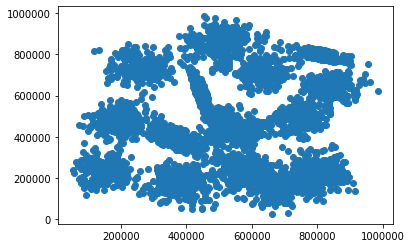

In [5]:
# Convert array of this type: ([x1, y1], [x2, y2], ..., [xn, yn])
# To an array of this type: ([x1, x2, ..., xn], [y1, y2, ..., yn])
points_to_plot = points.T

# List of x values
x = points_to_plot[0]

# List of y values
y = points_to_plot[1]

# Plot the points
plt.scatter(x,y)
plt.show()

#### 2.1.3 K-means

In [2]:
class KMeans:
    def __init__(self, n_clusters, max_iter = 100):
        self.n_clusters = n_clusters
        self.max_iter = 10**10 if max_iter == False else max_iter
        self.centroids = None
        self.labels = None
    
    def fit_predict(self, X, return_centroids = False, plot_clusters = False, plot_step = 5):
        """Run the K-means clustering on X.
        
        :param X: input data points, array, shape = (N, C).
        :return: labels : array, shape = N
        """
        points_to_plot = X.T

        # List of x values
        x = points_to_plot[0]

        # List of y values
        y = points_to_plot[1]
        
        # Initialize the labels vector (the one we will return)
        labels = [None] * len(X)
        
        # K = number of cluster
        K = self.n_clusters
        
        # Initialize the clusters list of dictionaries
        """Data structure:
        clusters = [
            # Cluster 1
            {
                label: 1,
                centroid: [10, 20],
                points: [
                    [5, 15],
                    [10, 20],
                    [15, 25]
                ]
            },
            ...
        ]
        """
        clusters = []
        
        # Select K points as the inital centroids (randomly)
        random_centroids = random.sample(list(X), K)
        
        i = 0
        for random_centroid in random_centroids:
            clusters.append({
                "label": i,
                "centroid": random_centroid,
                "points": []
            })
            i += 1
        
        # Iterate until max_iter iterations reached
        for i in range(0, self.max_iter):
            
            # Reset the points
            for cluster in clusters:
                cluster['points'] = []
            
            # For each point
            for j, point in enumerate(X):
                
                # Set the first cluster as the best one
                best_cluster = clusters[0]
                best_centroid = clusters[0]['centroid']
                best_distance_from_centroid = self.distance_between_points(point, best_centroid)
                
                # For each centroid from the second one
                for tmp_cluster in clusters[1:]:
                    tmp_distance_from_centroid = self.distance_between_points(point, tmp_cluster['centroid'])
                    
                    # If current centroid is closer to the previous one
                    if tmp_distance_from_centroid < best_distance_from_centroid:
                        best_cluster = tmp_cluster
                        best_distance_from_centroid = tmp_distance_from_centroid
                
                # Assign definitively the element to the closest centroid
                best_cluster['points'].append(point)
                labels[j] = best_cluster['label']
            
            # Recompute the centroid for each cluster
            has_some_centroid_changed = False
            
            for cluster in clusters:
                old_centroid = cluster['centroid']
                new_centroid = self.compute_centroid(cluster)
                
                if new_centroid != list(old_centroid):
                    has_some_centroid_changed = True
                    cluster['centroid'] = new_centroid
            
            if not has_some_centroid_changed:
                break
                
            # Plot clusters with a plot_step step
            if plot_clusters and (i+1) % plot_step == 0:
                centroids = list(map(lambda x: x['centroid'], clusters))
                centroids_x = list(map(lambda x: x[0], list(centroids)))
                centroids_y = list(map(lambda x: x[1], list(centroids)))
                plt.scatter(x,y,c=labels)
                plt.scatter(centroids_x,centroids_y,marker='*',c='red')
                plt.show()
        
#         print(f"K-mean did {i+1} iterations")
        if return_centroids:
            centroids = list(map(lambda x: x['centroid'], clusters))
            ret = labels, centroids
        else:
            ret = labels
        
        return ret
    
    def dump_to_file(self, filename):
        """Dump the evaluated labels to a CSV file."""
        # TO-DO:
        
        pass
    
    def distance_between_points(self, x1, x2):
        return ((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)**.5
    
    def compute_centroid(self, cluster):
        points = cluster['points']
        
        x_sum = sum(point[0] for point in points)
        y_sum = sum(point[1] for point in points)
        
        elements_number = len(points)
        
        x_mean = x_sum / elements_number
        y_mean = y_sum / elements_number
        
        return [x_mean, y_mean]

In [ ]:
n_clusters = 15

k_means = KMeans(n_clusters, 0)
labels = k_means.fit_predict(points)
plt.scatter(x,y,c=labels)
plt.show()

K-mean did 22 iterations


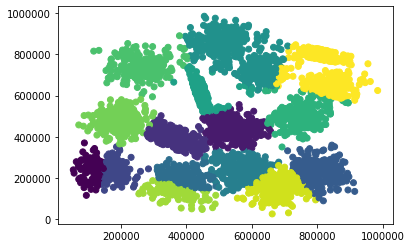

In [113]:
k_means = KMeans(n_clusters, max_iter = False)
labels = k_means.fit_predict(points)
plt.scatter(x,y,c=labels)
plt.show()

#### 2.1.5 Load Chameleon data and execute it

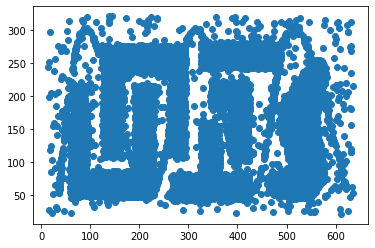

In [16]:
FILENAME_CHAMELEON = "./datasets/chamelon_clusters.txt"

chamelon_points = np.loadtxt(FILENAME_CHAMELEON, delimiter =',', skiprows=1)

# Convert array of this type: ([x1, y1], [x2, y2], ..., [xn, yn])
# To an array of this type: ([x1, x2, ..., xn], [y1, y2, ..., yn])
chamelon_points_to_plot = chamelon_points.T

# List of x values
chamelon_x = chamelon_points_to_plot[0]

# List of y values
chamelon_y = chamelon_points_to_plot[1]

# Plot the points
plt.scatter(chamelon_x,chamelon_y)
plt.show()

In [136]:
chamelon_n_clusters = 6

chamelon_k_means = KMeans(chamelon_n_clusters)

chamelon_labels = k_means.fit_predict(chamelon_points)

K-mean did 20 iterations


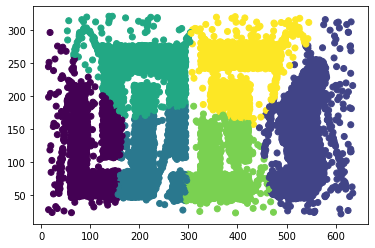

In [137]:
plt.scatter(chamelon_x,chamelon_y,c=chamelon_labels)
plt.show()

#### 2.1.6 Plot centroids

In [114]:
n_clusters = 15
k_means = KMeans(n_clusters)
labels, centroids = k_means.fit_predict(points, return_centroids = True)

K-mean did 11 iterations


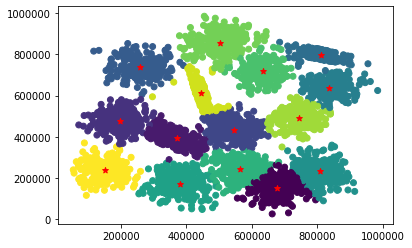

In [115]:
centroids_x = list(map(lambda x: x[0], list(centroids)))
centroids_y = list(map(lambda x: x[1], list(centroids)))

plt.scatter(x,y,c=labels)
plt.scatter(centroids_x,centroids_y,marker='*',c='red')
plt.show()

#### 2.1.7 Plot clusters with a given step

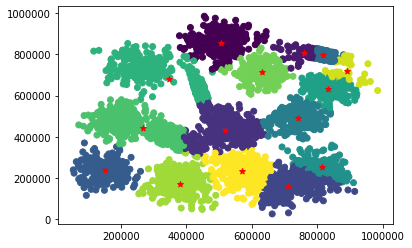

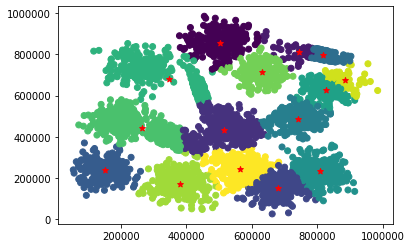

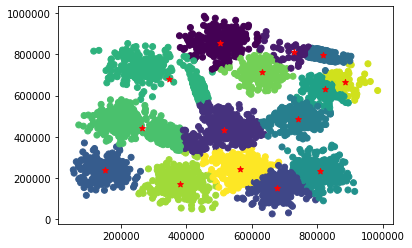

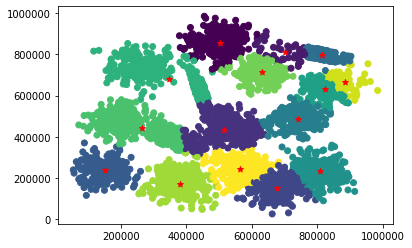

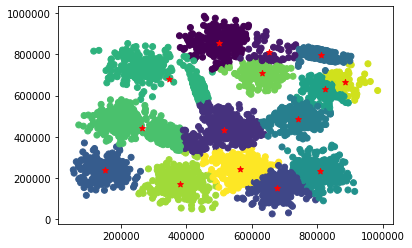

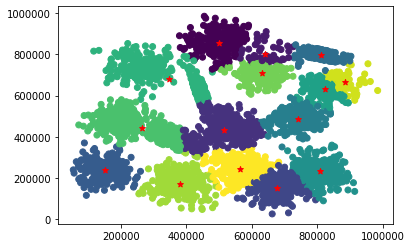

K-mean did 35 iterations


In [130]:
# Print 200 "\n" to use the scrollbar and visualize in a better way the map updating
# print("\n" * 200)

n_clusters = 15
k_means = KMeans(n_clusters)
_ = k_means.fit_predict(points, plot_clusters = True)

# 2.2 Evaluate clustering performance

#### 2.2.1 Design and implement two functions to compute the Silhouette

In [3]:
from scipy.spatial.distance import cdist

def silhouette_samples(X, labels):
    """Evaluate the silhouette for each point and return them as a list.
    :param X: input data points, array, shape = (N,C).
    :param labels: the list of cluster labels, shape = N.
    :return: silhouette : array, shape = N
    """
    
    # N = Number of points
    N = len(X)
    
    # K = Number of clusters
    K = len(set(labels))
    
    s = []
    
    # Pre-calculated matrix of distances
    distances = cdist(X, X, 'euclidean')
    
    # For each point "i"
    for i, point_i in enumerate(X):
        
        # Summation for a(i)
        a_sum = 0
        a_cnt = 0
        
        # Summation for b(i) (it's a list because we will take the minimum among all the clusters)
        b_sum = [0] * K
        b_cnt = [0] * K
        
        # For each point "j"
        for j in range(0, N):
            point_j = X[j]
            distance = distances[i, j]
            
            # If point_i and point_j belong to the same cluster
            if labels[i] == labels[j]:
                # Compute summation for a(i) if the point i is not the point j
                if (point_i != point_j).any():
                    a_sum += distance
                    a_cnt += 1
                
            if labels[i] != labels[j]:
                # Compute summation for b(i)
                b_sum[labels[j]] += distance
                b_cnt[labels[j]] += 1
        
        # Remove the 0 of the current cluster, otherwise the min() will take that value
        del b_sum[labels[i]]
        del b_cnt[labels[i]]
        
        a_i = a_sum / a_cnt
        b_i = b_sum[0]/b_cnt[0]
        
        for k in range(0, len(b_sum)):
            tmp_val = b_sum[k] / b_cnt[k]
            if tmp_val < b_i:
                b_i = tmp_val
        
        # Evaluate s(i)
        s_val = (b_i - a_i) / max(b_i, a_i)
        s.append(s_val)

    return s

def silhouette_score(X, labels):
    """Evaluate the silhouette for each point and return the mean.
    :param X: input data points, array, shape = (N,C).
    :param labels: the list of cluster labels, shape = N.
    :return: silhouette : float
    """
    return np.average(silhouette_samples(X, labels))

#### 2.2.2 Plot silhouette values sorted in ascending order

In [132]:
def plot_silhouette_values(silhouette_list):
    sorted_values = sorted(silhouette_list)
    x = range(0, len(sorted_values))
    y = sorted(s)
    plt.scatter(x, y)
    plt.show()

Gaussian dataset

K-mean did 19 iterations


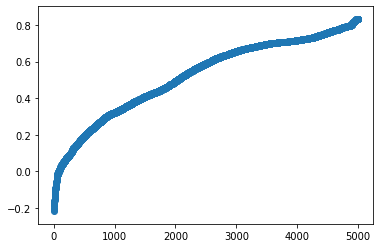

In [139]:
points = np.loadtxt(FILENAME_GAUSSIAN, delimiter =',', skiprows=1)
n_clusters = 15

k_means = KMeans(n_clusters)
labels = k_means.fit_predict(points)
s = silhouette_samples(points, labels)
plot_silhouette_values(s)

Chameleon dataset

K-mean did 21 iterations


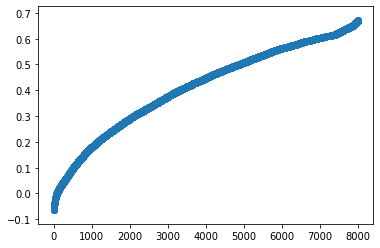

In [140]:
points = np.loadtxt(FILENAME_CHAMELEON, delimiter =',', skiprows=1)
n_clusters = 6

k_means = KMeans(n_clusters)
labels = k_means.fit_predict(points)
s = silhouette_samples(points, labels)
plot_silhouette_values(s)

#### 2.2.3 Automatically choose K

In [22]:
def choose_best_k(X, K_max = 30):
    best_K = False
    best_s = -1.1
    
    K_list = []
    s_list = []
    
    for K in range(2, K_max + 1):
#         print(f"Computing silhouette score for K = {K}...")
        k_means = KMeans(K)
        labels = k_means.fit_predict(X)
        s = silhouette_score(X, labels)
        
        K_list.append(K)
        s_list.append(s)
        
        if s > best_s:
            best_K = K
            best_s = s
    
    ret = {
        'best_K': best_K,
        'K_list': K_list,
        's_list': s_list,
    }
    return ret

In [11]:
points = np.loadtxt(FILENAME_GAUSSIAN, delimiter =',', skiprows=1)
K_list_obj = choose_best_k(points)
best_K = best_k_obj['best_K']
print(f"Best K value is {best_K}")

Computing silhouette score for K = 2...
Computing silhouette score for K = 3...
Computing silhouette score for K = 4...
Computing silhouette score for K = 5...
Computing silhouette score for K = 6...
Computing silhouette score for K = 7...
Computing silhouette score for K = 8...
Computing silhouette score for K = 9...
Computing silhouette score for K = 10...
Computing silhouette score for K = 11...
Computing silhouette score for K = 12...
Computing silhouette score for K = 13...
Computing silhouette score for K = 14...
Computing silhouette score for K = 15...
Computing silhouette score for K = 16...
Computing silhouette score for K = 17...
Computing silhouette score for K = 18...
Computing silhouette score for K = 19...
Computing silhouette score for K = 20...
Computing silhouette score for K = 21...
Computing silhouette score for K = 22...
Computing silhouette score for K = 23...
Computing silhouette score for K = 24...
Computing silhouette score for K = 25...
Computing silhouette sco

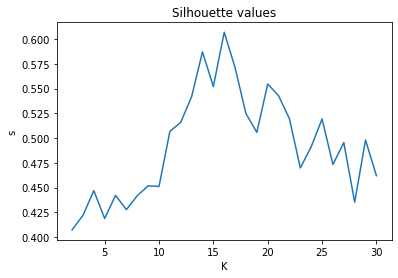

In [13]:
k_list = best_k_obj['K_list']
s_list = best_k_obj['s_list']
plt.plot(k_list, s_list)
plt.title("Silhouette values")
plt.xlabel("K")
plt.ylabel("s")
plt.show()

In [23]:
points_chamelon = np.loadtxt(FILENAME_CHAMELEON, delimiter =',', skiprows=1)
K_obj_chamelon = choose_best_k(points_chamelon)
best_K_chamelon = K_obj_chamelon['best_K']
print(f"Best K value is {best_K_chamelon}")

Best K value is 2


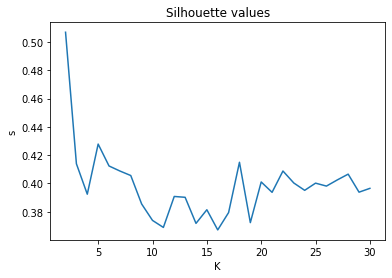

In [25]:
k_list = K_obj_chamelon['K_list']
s_list = K_obj_chamelon['s_list']
plt.plot(k_list, s_list)
plt.title("Silhouette values")
plt.xlabel("K")
plt.ylabel("s")
plt.show()